# Assignment 5

### Author : Omer Ozeren

### Introduction

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [1]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import webtext
import urllib.request as ur
import pandas as pd
import matplotlib.pyplot as plot
import string as str
from nltk.stem import PorterStemmer
%matplotlib inline

### 1. Choose a Corpus of Interest

I decided to use Project Guttenberg that it is a site which allows you to read books directly from the HTML.I choose the most popular data from website.The data can be found [here](http://www.gutenberg.org/files/84/84-h/84-h.htm). 

In [2]:
url="http://www.gutenberg.org/files/84/84-h/84-h.htm"
path = ur.urlopen(url)
raw = path.read().decode('utf8')

### 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [3]:
starting_position = raw.find("></a>Chapter 1</h2>\r\n\r\n<p>\r\n")
ending_position = raw.find("*** END OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN ***")
raw = raw[starting_position:ending_position]

In [4]:
raw_token = word_tokenize(raw)

len(set(raw_token))

7298

We have 7,298 defined words in the raw text file data. I will only take alpha numeric words and make all words lower case.

In [5]:
unique_words = [word for word in raw_token if word.isalpha()] #alphanumeric

unique_words = [word.lower() for word in unique_words] #lowercase

In [6]:
len(set(unique_words))

6613

In [7]:
unique_words[:10]

['chapter', 'p', 'i', 'am', 'by', 'birth', 'a', 'genevese', 'and', 'my']

We have 6,613 unique words.However, The unique words include letters which needs to be excluded from data.I will calculate the lenght of each item in unique words.

In [8]:
df_words_len = pd.DataFrame({'words':unique_words}) # from list to DataFrame
df_words_len['length'] = df_words_len['words'].apply(lambda x: len(x))
df_words_len

,words,length
0,chapter,7
1,p,1
2,i,1
3,am,2
4,by,2
...,...,...
71221,distance,8
71222,end,3
71223,chapter,7
71224,div,3


By looking at the DataFrame above, I can see that i need to exclude the words that have lenght 1.

In [9]:
exclude_words_df= (df_words_len[df_words_len['length']==1].sort_values(by='length'))
exclude_words_df.head()

,words,length
1,p,1
49085,i,1
49068,a,1
49057,p,1
49039,i,1


In [10]:
df_words_clean = df_words_len[df_words_len.length > 1]
df_words_clean

,words,length
0,chapter,7
3,am,2
4,by,2
5,birth,5
7,genevese,8
...,...,...
71221,distance,8
71222,end,3
71223,chapter,7
71224,div,3


In [11]:
unique_words=list(df_words_clean['words'])
len(unique_words)

66459

After removing words that has 1 characters, I can see that the total unique words in the corpus is **66,459.**

### 3.Taking the most common words, how many unique words represent half of the total words in the corpus?

In [12]:
data_freq_dist = nltk.FreqDist(unique_words)
data_freq_dist

FreqDist({'the': 3928, 'and': 2807, 'of': 2470, 'to': 1922, 'my': 1642, 'in': 1032, 'was': 999, 'that': 948, 'me': 811, 'had': 658, ...})

### Half of the unique words

In [13]:
len(unique_words)/2

33229.5

**Half of the unique words is 33,229 words.**

## Count of the Words

In [21]:
# the table
df_all_words = pd.DataFrame(unique_words,columns=['words'])
df_all_words_freq = pd.DataFrame(df_all_words['words'].value_counts()).reset_index(drop=False)
df_all_words_freq.columns = ['words', 'frequency']
df_all_words_freq.head(10)

,words,frequency
0,the,3928
1,and,2807
2,of,2470
3,to,1922
4,my,1642
5,in,1032
6,was,999
7,that,948
8,me,811
9,had,658


#### Lets find the most common words that represent half the total words in the corpus.

In [26]:
df_all_words_freq['count_frequency'] = df_all_words_freq['frequency'].cumsum()
df_all_words_freq.head()

,words,frequency,Count_frequency,count_frequency
0,the,3928,3928,3928
1,and,2807,6735,6735
2,of,2470,9205,9205
3,to,1922,11127,11127
4,my,1642,12769,12769


In [29]:
# find the amount of most common unique words that has the count of half of unique words
rst = len(df_all_words_freq[df_all_words_freq['count_frequency'] <= len(unique_words)/2])
print('{} unique words represents the half of the total unique words in the corpus.'.format(rst))

74 unique words represents the half of the total unique words in the corpus.


### 4. Identify the 200 highest frequency words in this corpus.

I am going to look at the unique words with highest frequency and review top 200 most common words..

In [31]:
data_freq_dist = nltk.FreqDist(unique_words)

top_words = data_freq_dist.most_common(200)

print(pd.DataFrame(top_words, columns = ['words', 'count']).head(200))

         words  count
0          the   3928
1          and   2807
2           of   2470
3           to   1922
4           my   1642
..         ...    ...
195     months     37
196    entered     37
197  mountains     37
198        new     37
199    morning     37

[200 rows x 2 columns]


when I review the outcome, "the", "and", "of" ,"to" "my" are in top of the list

### 5. Create a graph that shows the relative frequency of these 200 words.

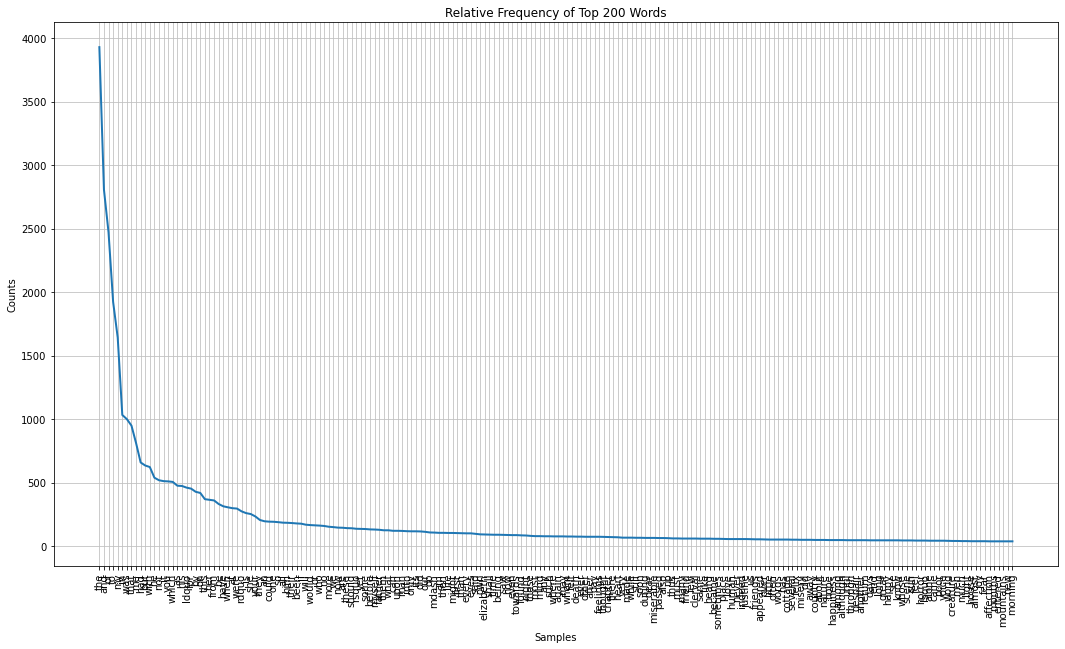

<AxesSubplot:title={'center':'Relative Frequency of Top 200 Words'}, xlabel='Samples', ylabel='Counts'>

In [33]:

plot.figure(figsize=(18, 10))

plot.xticks(rotation=90)

plot.rc('xtick', labelsize=7) 

plot.title("Relative Frequency of Top 200 Words")

data_freq_dist.plot(200)

### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.Thats means the word frequency has an inverse relationship to the rank in its frequency distribution. For example 4th most common word **(1642)** type should occur 50 times as frequently as the 200th most common word **(37)**.However, 37*50 =1850. In my cortus, I see partly this law play some role.

In [34]:
print(pd.DataFrame(top_words, columns = ['words', 'count']).head(200))

         words  count
0          the   3928
1          and   2807
2           of   2470
3           to   1922
4           my   1642
..         ...    ...
195     months     37
196    entered     37
197  mountains     37
198        new     37
199    morning     37

[200 rows x 2 columns]


### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora."

I will review another corpus and find out the frequent word of corpus and the difference of the frequency of the words  from all words in all corpora. I am doing to use Reuters Corpus. More information about Reuters Corupus can be found 
[here](https://www.nltk.org/book/ch02.html).

In [59]:
from nltk.corpus import reuters
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [79]:
# I am going to select coffee 
from nltk.corpus import reuters
reuters = reuters.words(categories='coffee')
unique_words_reuters = [word for word in reuters if word.isalpha()] #alphanumeric
unique_words_reuters = [word.lower() for word in unique_words_reuters] #lowercase
df_words = pd.DataFrame({'words':unique_words_reuters})
df_words['length'] = df_words['words'].apply(lambda x: len(x))
df_words_clean = (df_words[df_words['length']>1].sort_values(by='length'))
print('Before cleaning the letters unique words number :{}'.format(df_words.shape[0]))
print('After cleaning the letters unique words number :{}'.format(df_words_clean.shape[0]))
unique_words=list(df_words_clean['words'])
brown_freq_dist = nltk.FreqDist(unique_words)
highest_frequency_unique = brown_freq_dist.most_common(200)
highest_frequency_unique[0:5]

Before cleaning the letters unique word number :30656
After cleaning the letters unique word number :29568


[('the', 1710), ('to', 1005), ('of', 827), ('in', 649), ('coffee', 643)]

In [80]:
df_words_clean

,words,length
5346,to,2
8264,is,2
24909,it,2
8266,to,2
8267,be,2
...,...,...
1635,reafforestation,15
8346,overstimulating,15
30341,representatives,15
30522,representatives,15
